###  Problem Statement

Customer Personality Analysis is a detailed analysis of a company’s ideal customers. It helps a business to better understand its customers and makes it easier for them to modify products according to the specific needs, behaviors and concerns of different types of customers.

Customer personality analysis helps a business to modify its product based on its target customers from different types of customer segments. For example, instead of spending money to market a new product to every customer in the company’s database, a company can analyze which customer segment is most likely to buy the product and then market the product only on that particular segment.

### Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import plotly.figure_factory as ff
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import AgglomerativeClustering
from sklearn.decomposition import PCA
from sklearn.metrics import confusion_matrix

# ignore warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_excel('marketing_campaign1 (1).xlsx')

In [3]:
data.head()

ID  Year_Birth   Education Marital_Status   Income  Kidhome  Teenhome  \
0  5524        1957  Graduation         Single  58138.0        0         0   
1  2174        1954  Graduation         Single  46344.0        1         1   
2  4141        1965  Graduation       Together  71613.0        0         0   
3  6182        1984  Graduation       Together  26646.0        1         0   
4  5324        1981         PhD        Married  58293.0        1         0   

  Dt_Customer  Recency  MntWines  ...  NumWebVisitsMonth  AcceptedCmp3  \
0  2012-09-04       58       635  ...                  7             0   
1  2014-03-08       38        11  ...                  5             0   
2  2013-08-21       26       426  ...                  4             0   
3  2014-02-10       26        11  ...                  6             0   
4  2014-01-19       94       173  ...                  5             0   

   AcceptedCmp4  AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  Complain  \
0             0             0             0             0         0   
1             0             0             0             0         0   
2             0             0             0             0         0   
3             0             0             0             0         0   
4             0             0             0             0         0   

   Z_CostContact  Z_Revenue  Response  
0              3         11         1  
1              3         11         0  
2              3         11         0  
3              3         11         0  
4              3         11         0  

[5 rows x 29 columns]

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   ID                   2240 non-null   int64         
 1   Year_Birth           2240 non-null   int64         
 2   Education            2240 non-null   object        
 3   Marital_Status       2240 non-null   object        
 4   Income               2216 non-null   float64       
 5   Kidhome              2240 non-null   int64         
 6   Teenhome             2240 non-null   int64         
 7   Dt_Customer          2240 non-null   datetime64[ns]
 8   Recency              2240 non-null   int64         
 9   MntWines             2240 non-null   int64         
 10  MntFruits            2240 non-null   int64         
 11  MntMeatProducts      2240 non-null   int64         
 12  MntFishProducts      2240 non-null   int64         
 13  MntSweetProducts     2240 non-nul

In [5]:
# Check Null
data.isnull().sum()
 # check which column contain null

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64

In [6]:
numeric_columns = data.select_dtypes(include=[np.number]).columns
medians = data[numeric_columns].median()

# Replace null values in numeric columns with the respective column medians
data[numeric_columns] = data[numeric_columns].fillna(medians)

# For non-numeric columns, fill null values with the mode or a constant value
non_numeric_columns = data.select_dtypes(exclude=[np.number]).columns
for column in non_numeric_columns:
    mode = data[column].mode().iloc[0]  # Get the most frequent value (mode)
    data[column] = data[column].fillna(mode)

# Optionally, handle columns that are still all null (e.g., drop them or fill with a constant)
data = data.dropna(axis=1, how='all')  # Drop columns where all values are null


In [7]:
data.isnull().sum() 

ID                     0
Year_Birth             0
Education              0
Marital_Status         0
Income                 0
Kidhome                0
Teenhome               0
Dt_Customer            0
Recency                0
MntWines               0
MntFruits              0
MntMeatProducts        0
MntFishProducts        0
MntSweetProducts       0
MntGoldProds           0
NumDealsPurchases      0
NumWebPurchases        0
NumCatalogPurchases    0
NumStorePurchases      0
NumWebVisitsMonth      0
AcceptedCmp3           0
AcceptedCmp4           0
AcceptedCmp5           0
AcceptedCmp1           0
AcceptedCmp2           0
Complain               0
Z_CostContact          0
Z_Revenue              0
Response               0
dtype: int64

In [8]:
data.duplicated().sum()

0

In [9]:
data.shape

(2240, 29)

In [10]:
data.describe()

ID   Year_Birth         Income      Kidhome     Teenhome  \
count   2240.000000  2240.000000    2240.000000  2240.000000  2240.000000   
mean    5592.159821  1968.805804   52237.975446     0.444196     0.506250   
std     3246.662198    11.984069   25037.955891     0.538398     0.544538   
min        0.000000  1893.000000    1730.000000     0.000000     0.000000   
25%     2828.250000  1959.000000   35538.750000     0.000000     0.000000   
50%     5458.500000  1970.000000   51381.500000     0.000000     0.000000   
75%     8427.750000  1977.000000   68289.750000     1.000000     1.000000   
max    11191.000000  1996.000000  666666.000000     2.000000     2.000000   

           Recency     MntWines    MntFruits  MntMeatProducts  \
count  2240.000000  2240.000000  2240.000000      2240.000000   
mean     49.109375   303.935714    26.302232       166.950000   
std      28.962453   336.597393    39.773434       225.715373   
min       0.000000     0.000000     0.000000         0.000000   
25%      24.000000    23.750000     1.000000        16.000000   
50%      49.000000   173.500000     8.000000        67.000000   
75%      74.000000   504.250000    33.000000       232.000000   
max      99.000000  1493.000000   199.000000      1725.000000   

       MntFishProducts  ...  NumWebVisitsMonth  AcceptedCmp3  AcceptedCmp4  \
count      2240.000000  ...        2240.000000   2240.000000   2240.000000   
mean         37.525446  ...           5.316518      0.072768      0.074554   
std          54.628979  ...           2.426645      0.259813      0.262728   
min           0.000000  ...           0.000000      0.000000      0.000000   
25%           3.000000  ...           3.000000      0.000000      0.000000   
50%          12.000000  ...           6.000000      0.000000      0.000000   
75%          50.000000  ...           7.000000      0.000000      0.000000   
max         259.000000  ...          20.000000      1.000000      1.000000   

       AcceptedCmp5  AcceptedCmp1  AcceptedCmp2     Complain  Z_CostContact  \
count   2240.000000   2240.000000   2240.000000  2240.000000         2240.0   
mean       0.072768      0.064286      0.013393     0.009375            3.0   
std        0.259813      0.245316      0.114976     0.096391            0.0   
min        0.000000      0.000000      0.000000     0.000000            3.0   
25%        0.000000      0.000000      0.000000     0.000000            3.0   
50%        0.000000      0.000000      0.000000     0.000000            3.0   
75%        0.000000      0.000000      0.000000     0.000000            3.0   
max        1.000000      1.000000      1.000000     1.000000            3.0   

       Z_Revenue     Response  
count     2240.0  2240.000000  
mean        11.0     0.149107  
std          0.0     0.356274  
min         11.0     0.000000  
25%         11.0     0.000000  
50%         11.0     0.000000  
75%         11.0     0.000000  
max         11.0     1.000000  

[8 rows x 26 columns]

## Feature Engineering

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   ID                   2240 non-null   int64         
 1   Year_Birth           2240 non-null   int64         
 2   Education            2240 non-null   object        
 3   Marital_Status       2240 non-null   object        
 4   Income               2240 non-null   float64       
 5   Kidhome              2240 non-null   int64         
 6   Teenhome             2240 non-null   int64         
 7   Dt_Customer          2240 non-null   datetime64[ns]
 8   Recency              2240 non-null   int64         
 9   MntWines             2240 non-null   int64         
 10  MntFruits            2240 non-null   int64         
 11  MntMeatProducts      2240 non-null   int64         
 12  MntFishProducts      2240 non-null   int64         
 13  MntSweetProducts     2240 non-nul

Dt_Customer that indicates the date a customer joined the database is not parsed as DateTime

In [12]:
data['Dt_Customer'] = pd.to_datetime(data['Dt_Customer'])

In [13]:
print("The newest customer's enrolment date in the records:", max(data['Dt_Customer']))
print("The oldest customer's enrolment date in the records:", min(data['Dt_Customer']))

The newest customer's enrolment date in the records: 2014-06-29 00:00:00
The oldest customer's enrolment date in the records: 2012-07-30 00:00:00


Extract the "Age" of a customer by the "Year_Birth" indicating the birth year of the respective person.

In [14]:
data['Age'] = 2015 - data['Year_Birth']

Create another feature "Spent" indicating the total amount spent by the customer in various categories over the span of two years.

In [15]:
data['Spent'] = data['MntWines'] + data['MntFruits'] + data['MntMeatProducts'] + data['MntFishProducts'] + data['MntSweetProducts'] + data['MntGoldProds']
     

Create another feature "Living_With" out of "Marital_Status" to extract the living situation of couples.

In [16]:
data['Living_With'] = data['Marital_Status'].replace({'Married':'Partner', 'Together':'Partner', 'Absurd':'Alone', 'Widow':'Alone', 'YOLO':'Alone', 'Divorced':'Alone', 'Single':'Alone'})
     

Create a feature "Children" to indicate total children in a household that is, kids and teenagers.

In [17]:
data['Dependent'] = data['Kidhome'] + data['Teenhome']

To get further clarity of household, Creating feature indicating "Family_Size"

In [18]:
data['Family_Size'] = data['Living_With'].replace({'Alone': 1, 'Partner':2}) + data['Dependent']

Create a feature "Is_Parent" to indicate parenthood status

In [19]:
data['Is_Parent'] = np.where(data.Dependent > 0, 1, 0)

Website activity

In [20]:
website_cols = ['NumWebPurchases', 'NumWebVisitsMonth']
data['Website_Activity'] = data[website_cols].sum(axis=1)

Segmenting education levels in three groups

In [21]:
data['Education'] = data['Education'].replace({'Basic':'Undergraduate', '2n Cycle':'Undergraduate', 'Graduation':'Graduate', 'Master':'Postgraduate', 'PhD':'Postgraduate'})


Dropping some of the redundant features

In [22]:
to_drop = ['Marital_Status', 'Dt_Customer', 'Z_CostContact', 'Z_Revenue', 'Year_Birth', 'ID']
data = data.drop(to_drop, axis=1)

In [23]:
data.head(5)

Education   Income  Kidhome  Teenhome  Recency  MntWines  MntFruits  \
0      Graduate  58138.0        0         0       58       635         88   
1      Graduate  46344.0        1         1       38        11          1   
2      Graduate  71613.0        0         0       26       426         49   
3      Graduate  26646.0        1         0       26        11          4   
4  Postgraduate  58293.0        1         0       94       173         43   

   MntMeatProducts  MntFishProducts  MntSweetProducts  ...  AcceptedCmp2  \
0              546              172                88  ...             0   
1                6                2                 1  ...             0   
2              127              111                21  ...             0   
3               20               10                 3  ...             0   
4              118               46                27  ...             0   

   Complain  Response  Age  Spent  Living_With  Dependent  Family_Size  \
0         0         1   58   1617        Alone          0            1   
1         0         0   61     27        Alone          2            3   
2         0         0   50    776      Partner          0            2   
3         0         0   31     53      Partner          1            3   
4         0         0   34    422      Partner          1            3   

   Is_Parent  Website_Activity  
0          0                15  
1          1                 6  
2          0                12  
3          1                 8  
4          1                10  

[5 rows x 30 columns]

### EDA - Exploratory Data Analysis

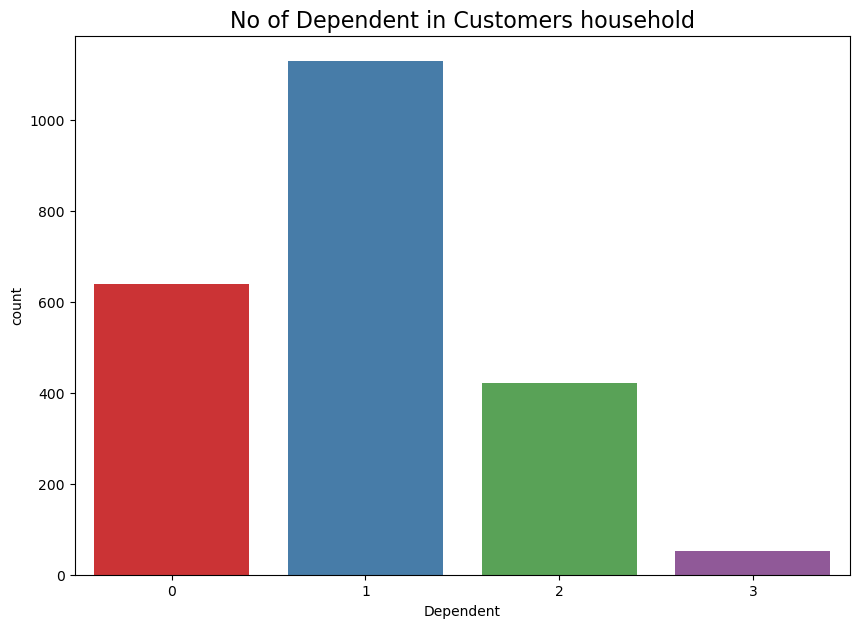

In [24]:
# family size dist
plt.figure(figsize=[10, 7])
order = data['Dependent'].value_counts().index
sns.countplot(x='Dependent', data=data, palette='Set1')
plt.title('No of Dependent in Customers household', fontsize=16)
plt.show();

Majority of the customers have a single dependent.

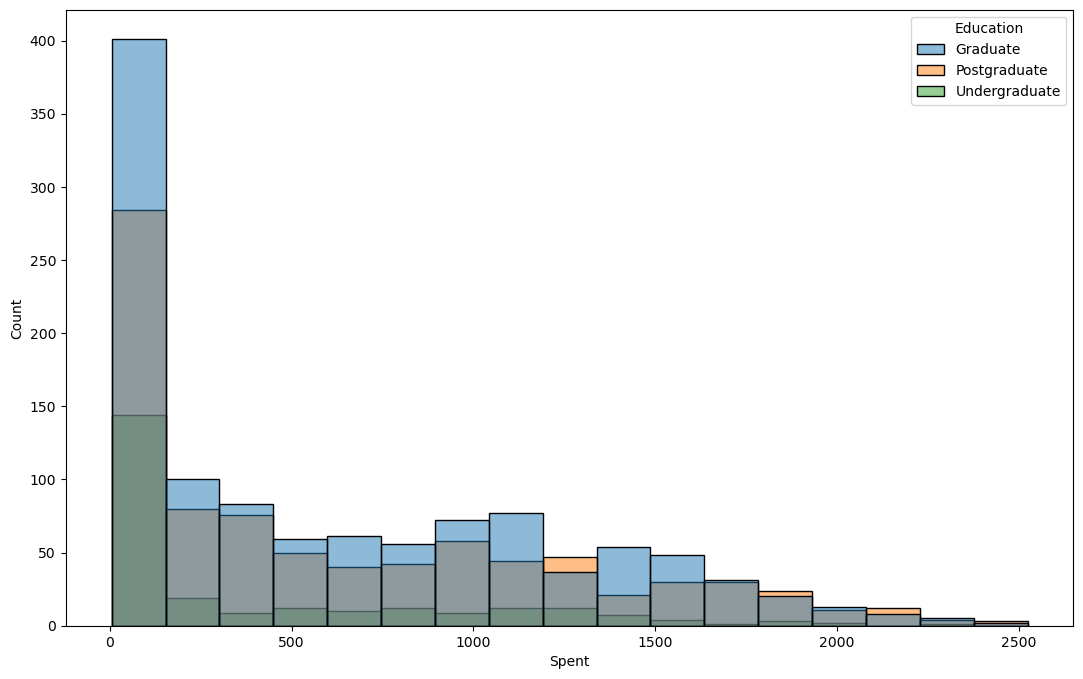

In [25]:
plt.figure(figsize=(13,8))
sns.histplot(x=data['Spent'], hue=data['Education']);

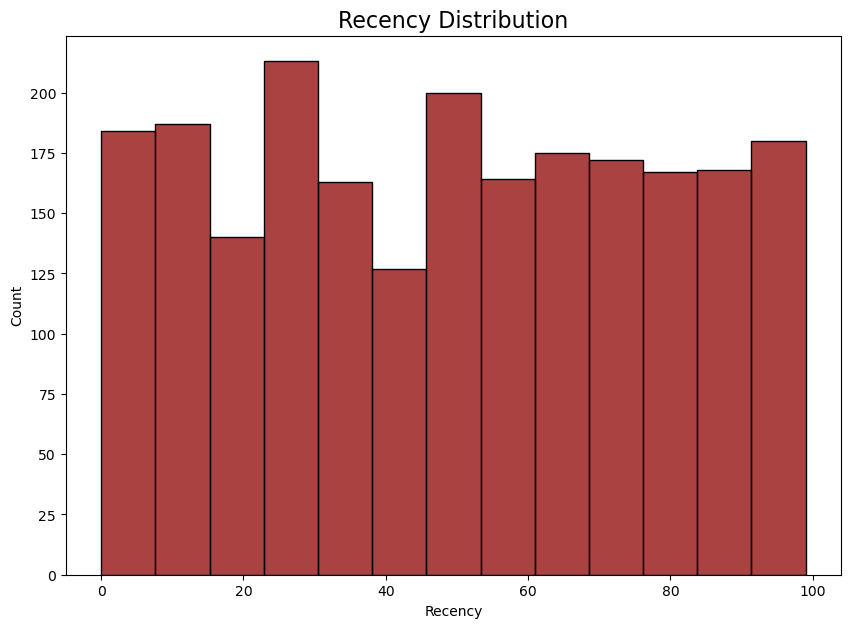

In [26]:
# Recency distribution
plt.figure(figsize=[10, 7])
sns.histplot(data=data, x='Recency', color='#8e0201')
plt.title('Recency Distribution', fontsize=16)
plt.show();

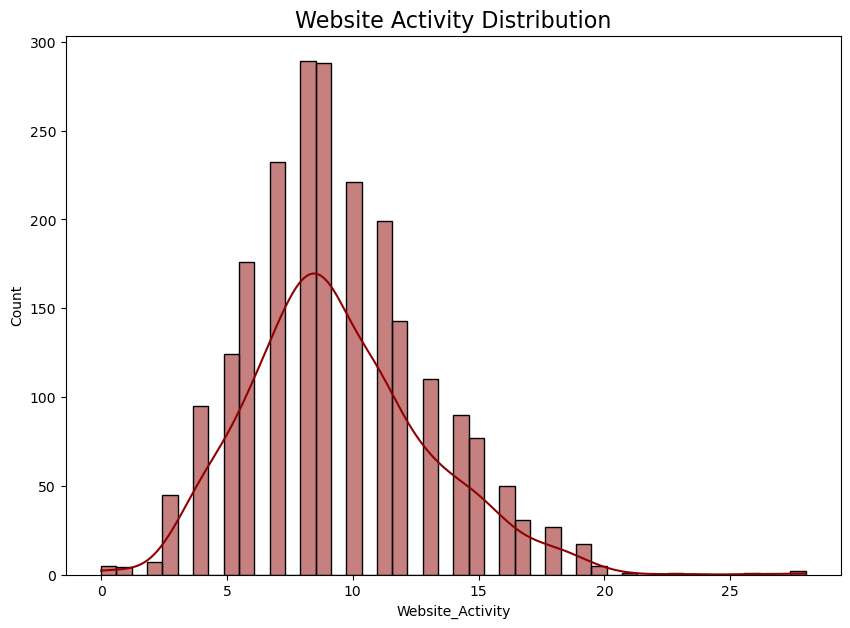

In [27]:
# Website_Activity dist
plt.figure(figsize=[10, 7])
sns.histplot(data['Website_Activity'], kde=True, color='#8e0201')
plt.title('Website Activity Distribution', fontsize=16)
plt.show();

The Website Activity distribution is positively skewed

<Axes: ylabel='Education'>

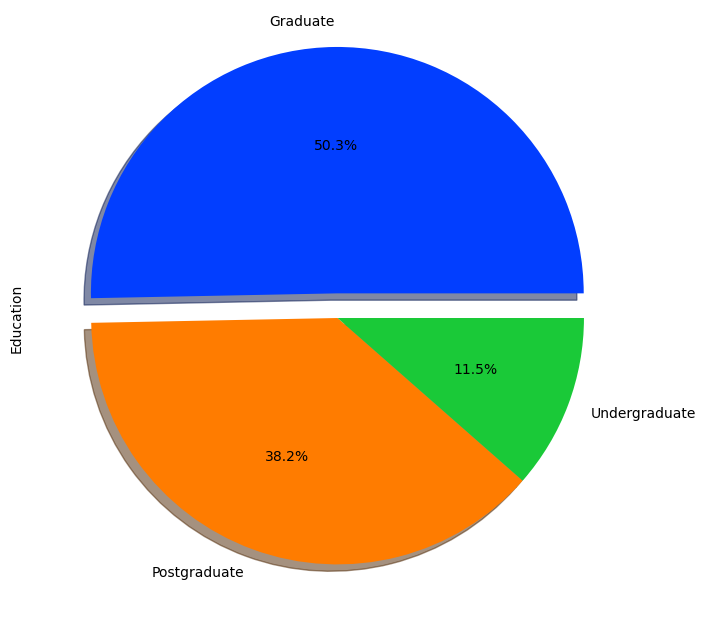

In [28]:
data['Education'].value_counts().plot.pie(explode=[0.1,0,0], autopct='%1.1f%%', shadow=True, figsize=(8,8), colors=sns.color_palette('bright'))

<Figure size 1000x700 with 0 Axes>

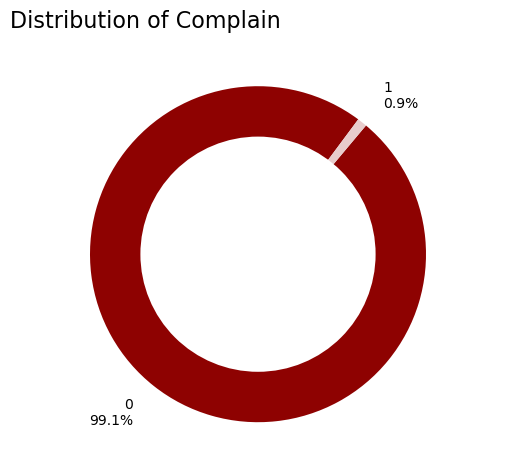

In [29]:
# Complain distribution
plt.figure(figsize=[10, 7])
counts = data['Complain'].value_counts()
labels = [f"{attendance}\n{count / len(data) * 100:.1f}%" for attendance, count in counts.items()]
colors = ['#8e0201', '#e8cccc']
fig, ax = plt.subplots()
ax.pie(counts, labels=labels, startangle=50, counterclock=False, pctdistance=0.8, labeldistance=1.2, colors=colors)
centre_circle = plt.Circle((0,0),0.70,fc='white')
fig.gca().add_artist(centre_circle)
ax.set_title('Distribution of Complain', fontsize=16, loc='left', pad=30)
ax.axis('equal')
plt.show();


A vast majority of the customers did not complain in the last two years.

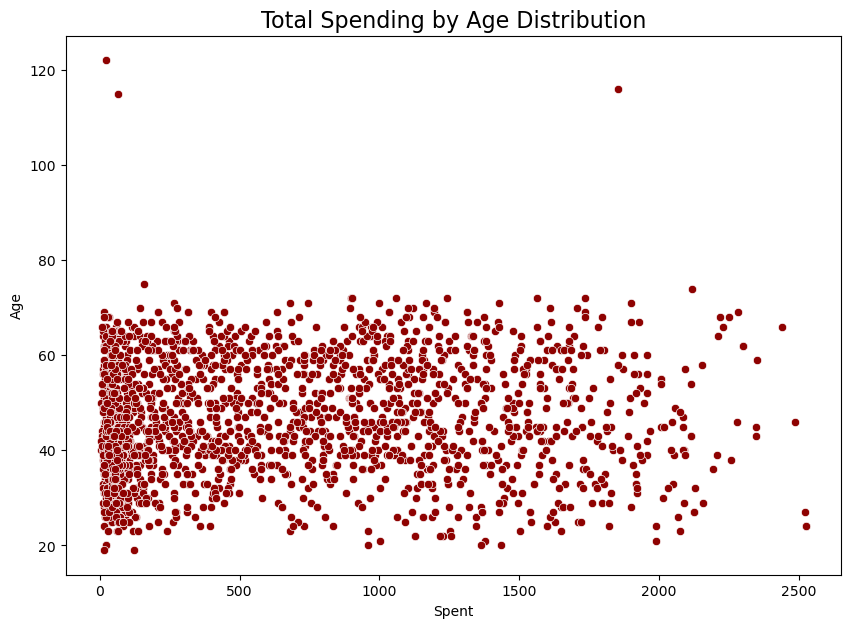

In [30]:
# Total Spending by Age Distribution
plt.figure(figsize=[10, 7])
sns.scatterplot(data=data, x='Spent', y='Age',  color='#8e0201')
plt.title('Total Spending by Age Distribution', fontsize=16)
plt.show();

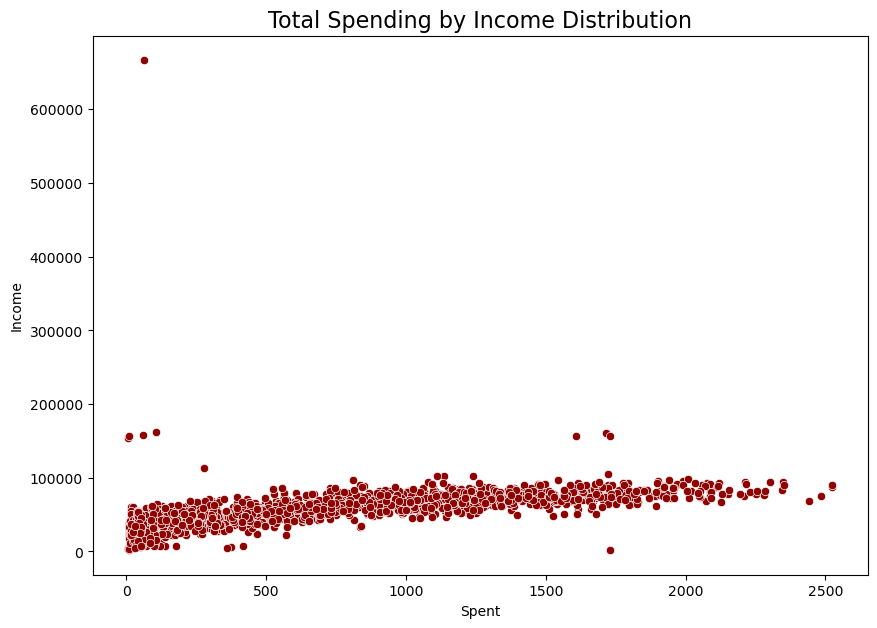

In [31]:
# Total Spending by Income Distribution
plt.figure(figsize=[10, 7])
sns.scatterplot(data=data, x='Spent',  y='Income',  color='#8e0201')
plt.title('Total Spending by Income Distribution', fontsize=16)
plt.show();

The Income of customers is positively correlated with the total amount they have spent.

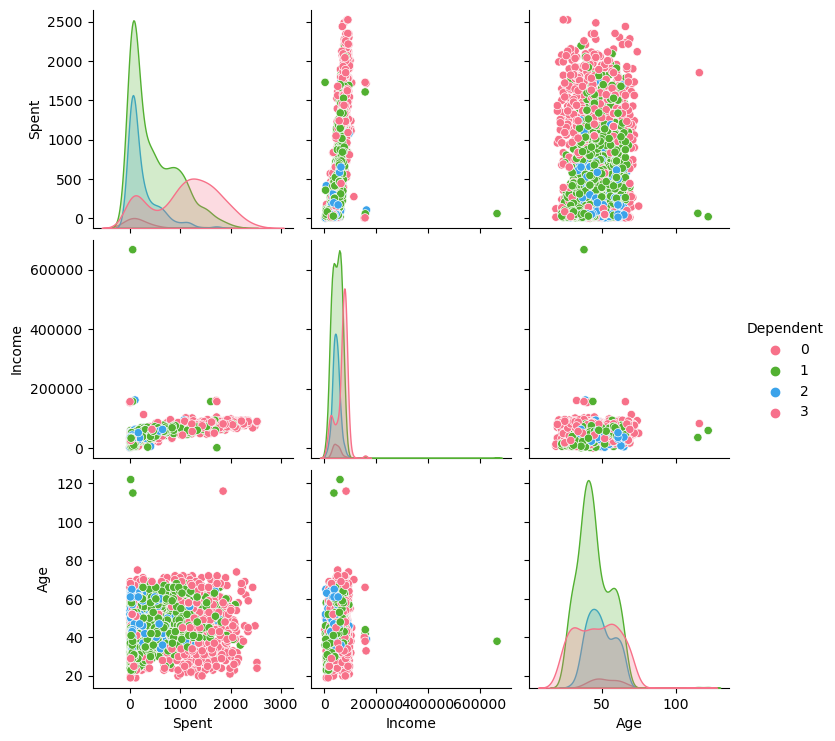

In [32]:
sns.pairplot(data , vars=['Spent','Income','Age'] , hue='Dependent', palette='husl');


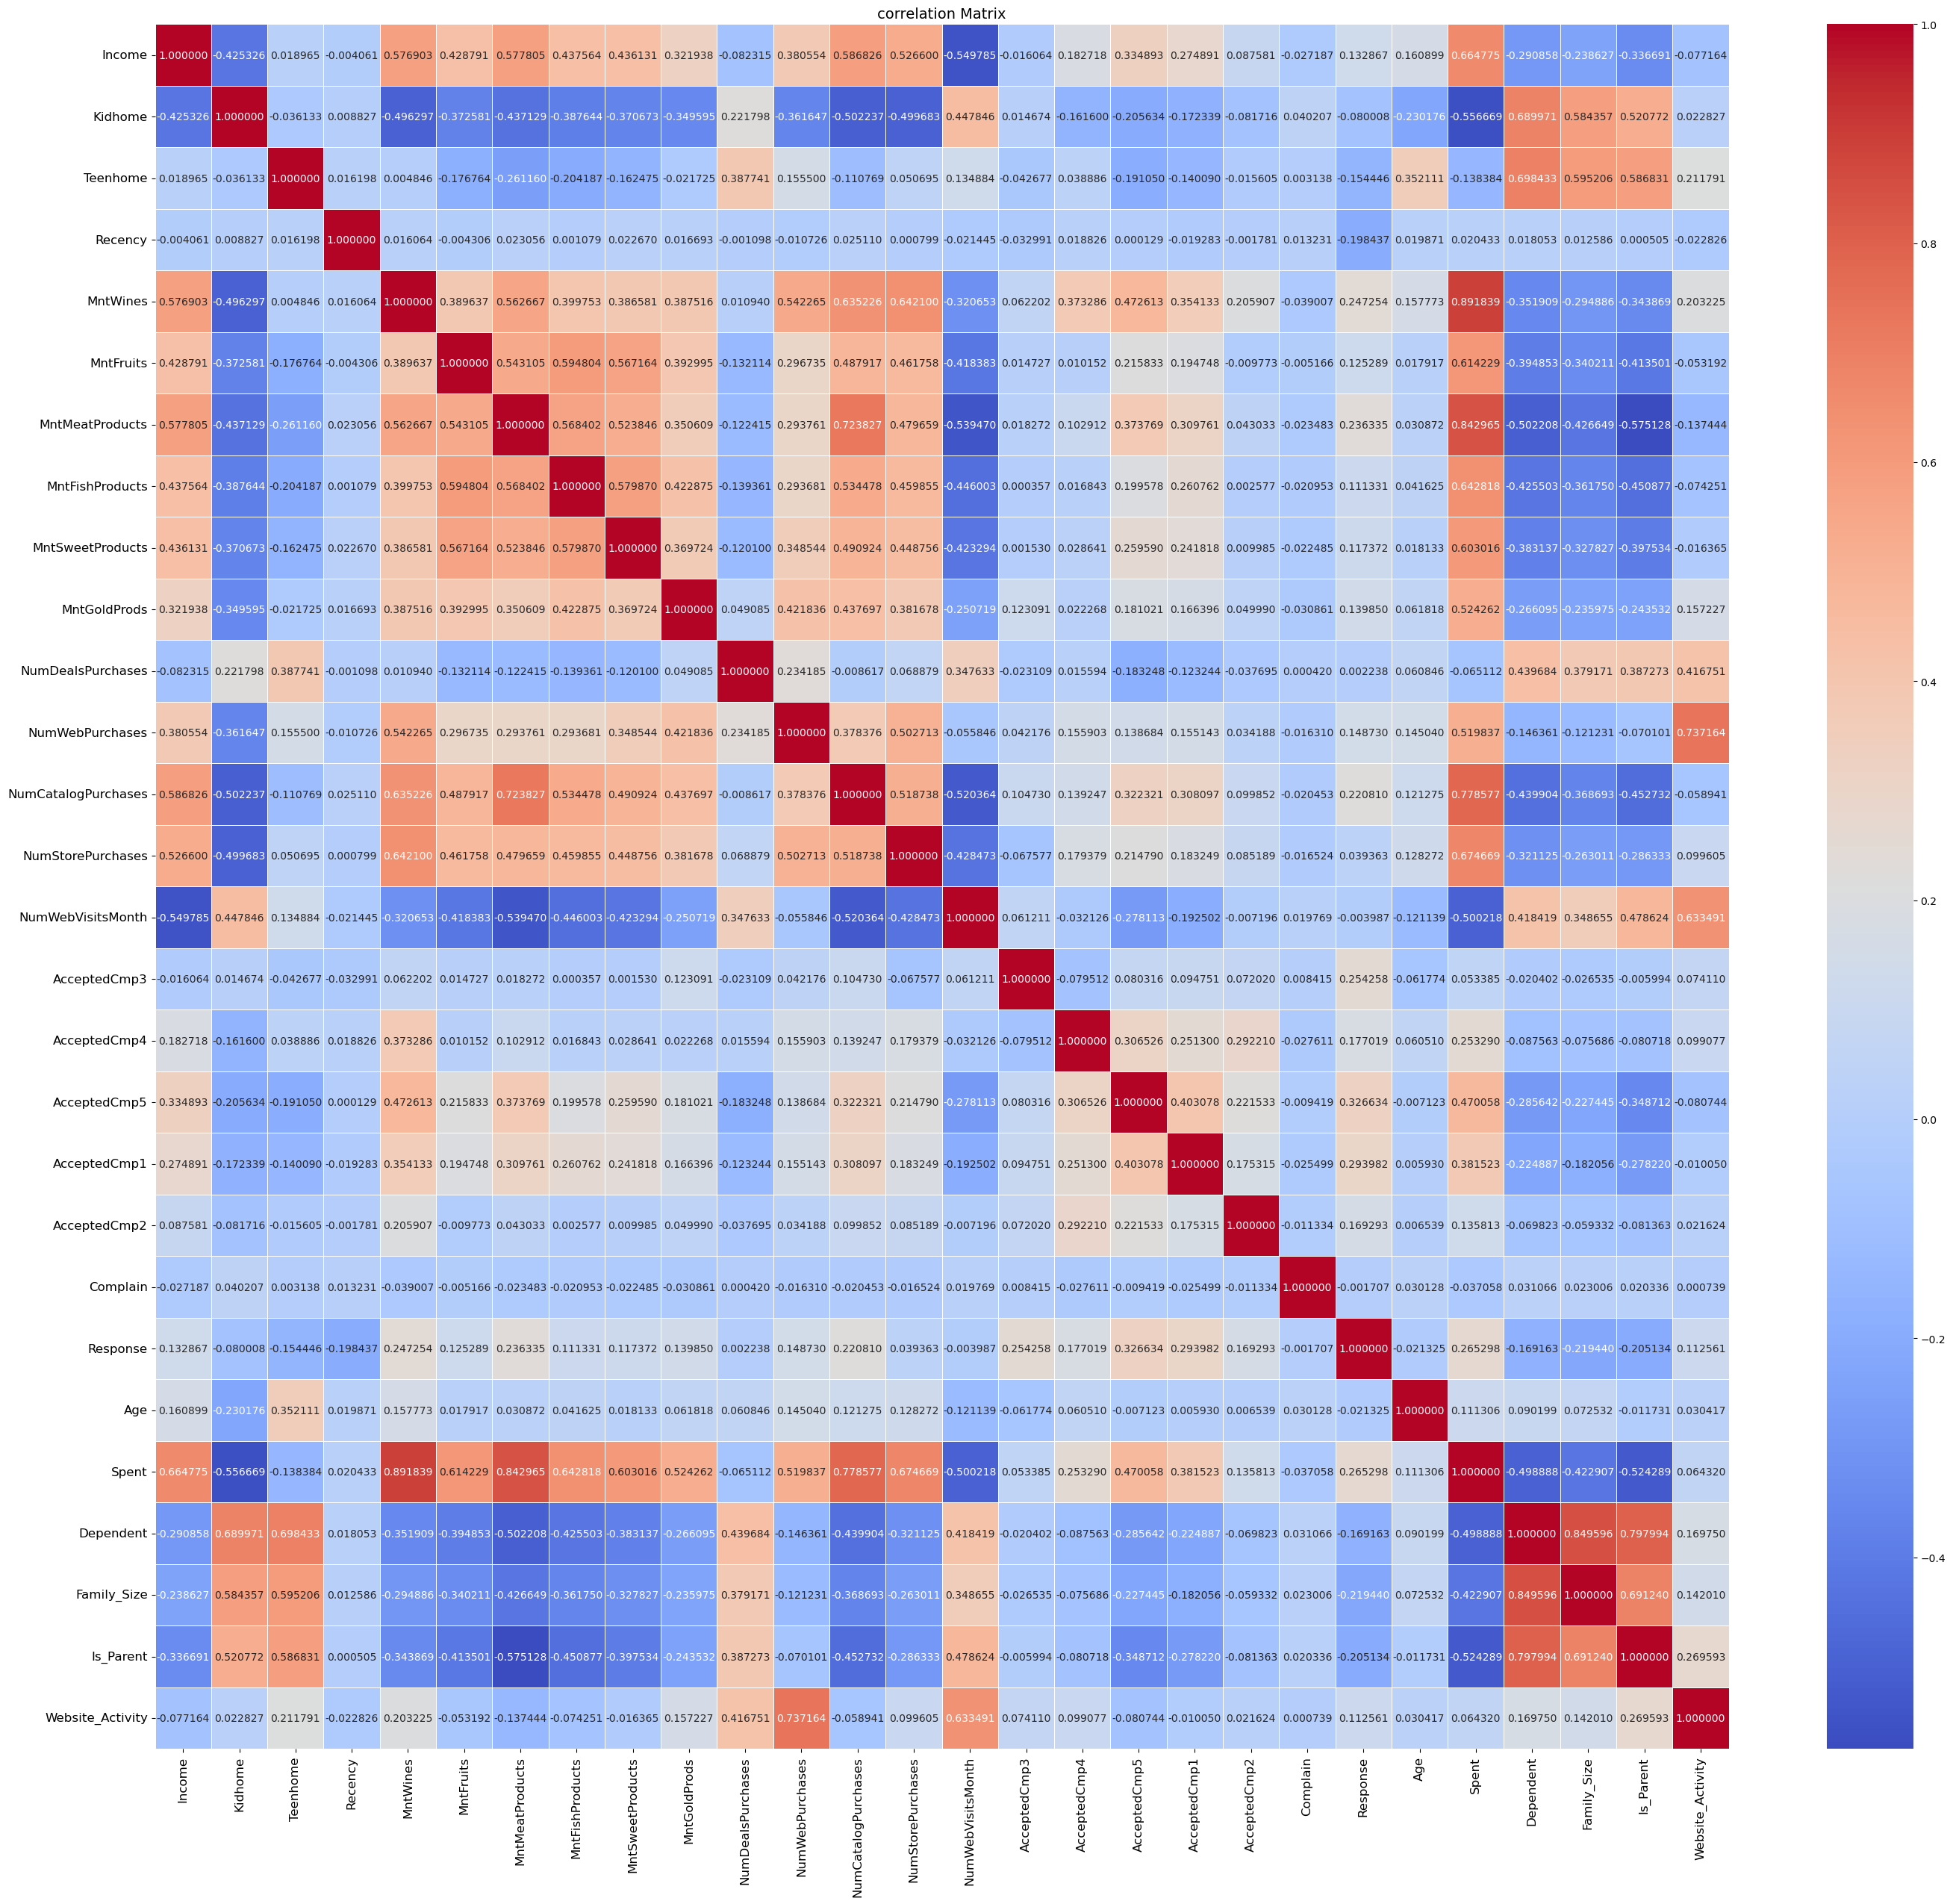

In [33]:
# Correalation matrix
corr=data.corr()
plt.figure(figsize=[34,30])
sns.heatmap(corr,annot=True, cmap='coolwarm',fmt='2f',linewidths=0.5)
plt.title('correlation Matrix',fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show();

##  Outlier Detection

##### The presence of outliers in a classification or regression dataset can result in a poor fit and lower predictive modeling performance, therefore we should see there are ouliers in the data.

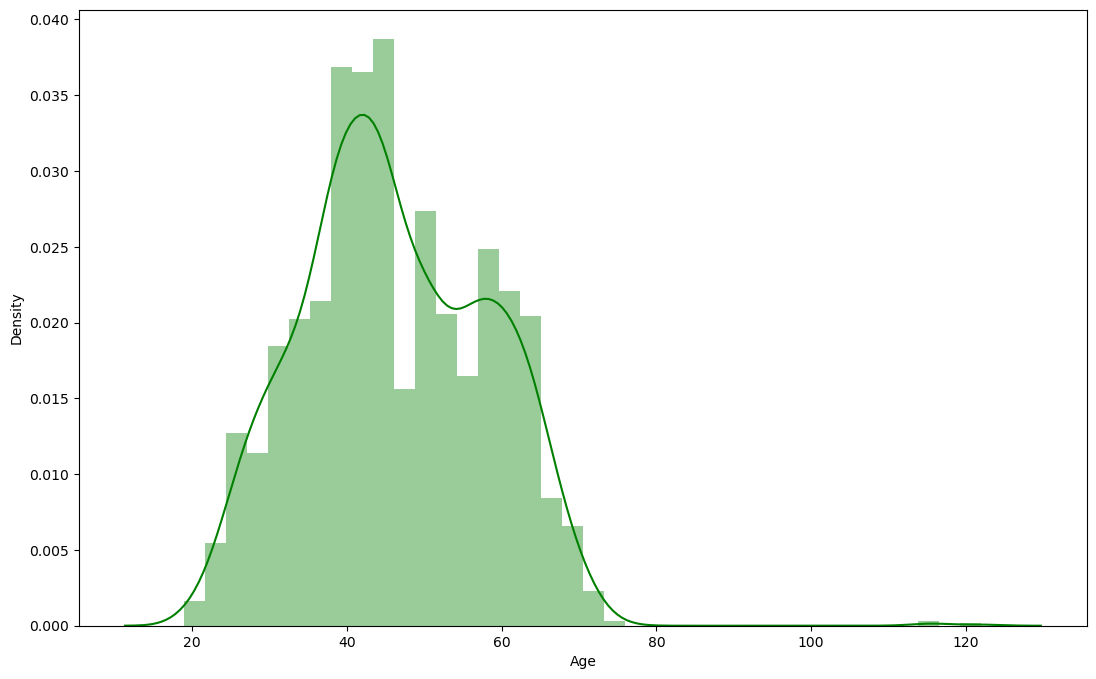

In [34]:
plt.figure(figsize=(13,8))
sns.distplot(data.Age, color='green');

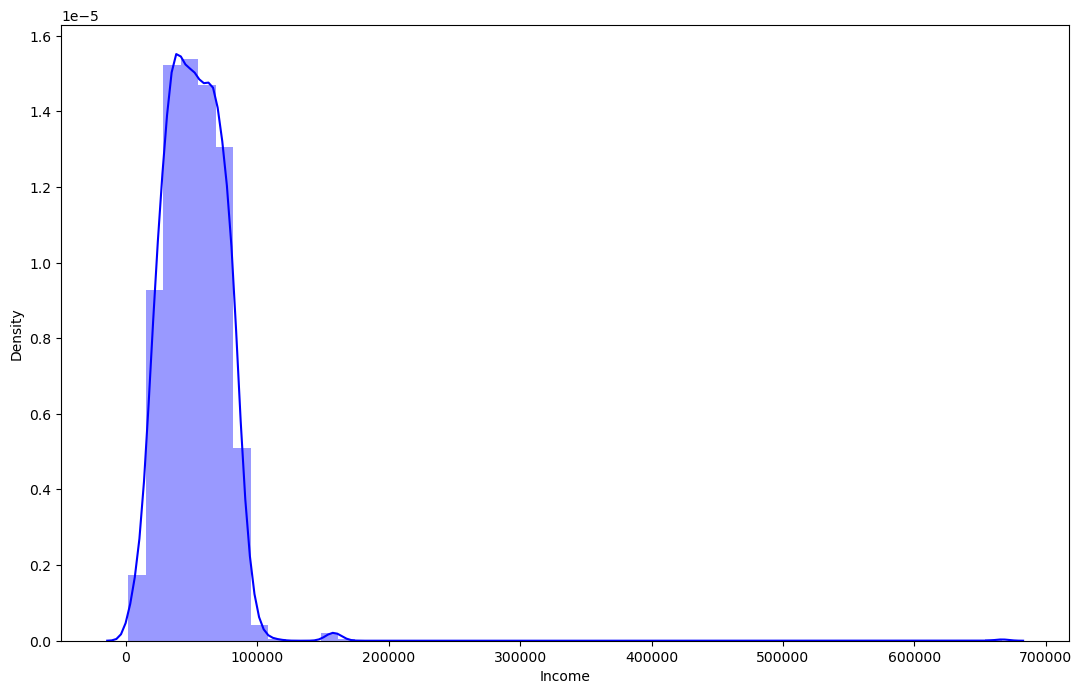

In [35]:
plt.figure(figsize=(13,8))
sns.distplot(data.Income, color='blue');

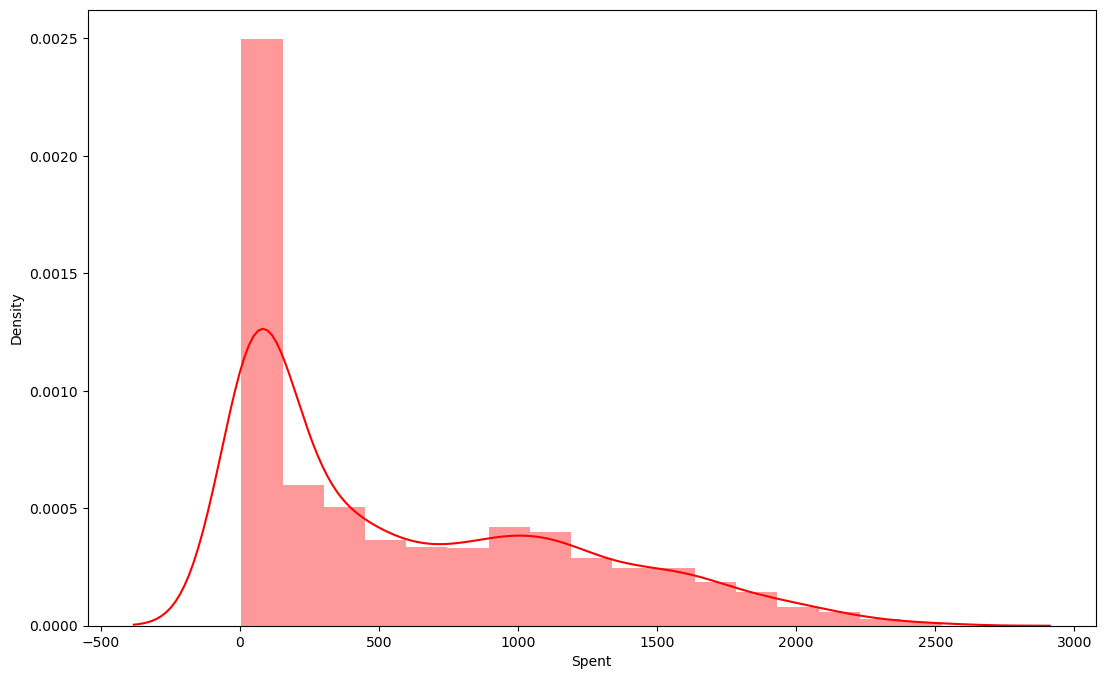

In [36]:
plt.figure(figsize=(13,8))
sns.distplot(data.Spent, color='red');

#### Another way of visualising outliers is using boxplots and whiskers, which provides the quantiles (box) and inter-quantile range (whiskers), with the outliers sitting outside the error bars (whiskers).

In [37]:
# checking for outliers
def print_outliers(column):
    q1 = column.quantile(0.25)
    q3 = column.quantile(0.75)
    iqr = q3 - q1
    lower_fence = q1 - 1.5 * iqr
    upper_fence = q3 + 1.5 * iqr
    outliers = column[(column < lower_fence) | (column > upper_fence)]
    
    print(f"Outliers in {column.name}:")
    print(outliers)
print_outliers(data['Age'])
print_outliers(data['Income'])

Outliers in Age:
192    115
239    122
339    116
Name: Age, dtype: int64
Outliers in Income:
164     157243.0
617     162397.0
655     153924.0
687     160803.0
1300    157733.0
1653    157146.0
2132    156924.0
2233    666666.0
Name: Income, dtype: float64


Removing outliers in the Age and Income columns is necessary for several reasons. Firstly, outliers in the data, such as ages of 115 or 122, and unusually high incomes like 666,666, may indicate errors or data entry mistakes. Secondly, outliers can have a significant impact on the performance of statistical models, as they can disproportionately influence the results. The removal of outliers eRemoving outliers in the Age and Income columns is necessary for several reasons. Firstly, outliers in the data, such as ages of 115 or 122, and unusually high incomes like 666,666, may indicate errors or data entry mistakes. Secondly, outliers can have a significant impact on the performance of statistical models, as they can disproportionately influence the results. The removal of outliers ensures the model can focus on the majority of the data and provide more accurate predictions.


In [38]:
# removing outliers
def remove_outliers(column):
    q1 = column.quantile(0.25)
    q3 = column.quantile(0.75)
    iqr = q3 - q1
    lower_fence = q1 - (1.5 * iqr)
    upper_fence = q3 + (1.5 * iqr)
    
    no_outliers = column[(column >= lower_fence) & (column <= upper_fence)]
    return no_outliers

no_outliers_age = remove_outliers(data['Age'])
no_outliers_income = remove_outliers(data['Income'])
data = data[(data['Age'].isin(no_outliers_age)) & (data['Income'].isin(no_outliers_income))]
data.sample(10)

Education   Income  Kidhome  Teenhome  Recency  MntWines  MntFruits  \
1409   Postgraduate  36957.0        1         1       43       100          2   
2164  Undergraduate  15253.0        1         0       13         1          3   
187        Graduate  61286.0        0         1       34       356          0   
1301       Graduate  94384.0        0         0       62      1111         24   
2022       Graduate  48195.0        1         1       53       106         27   
724        Graduate   7500.0        1         0       19         7          0   
115        Graduate  50785.0        1         1       27        64          1   
1793       Graduate  37697.0        1         0       82        34          6   
1464   Postgraduate  28072.0        1         0       10        30          0   
556    Postgraduate  54880.0        1         0       57       308         85   

      MntMeatProducts  MntFishProducts  MntSweetProducts  ...  AcceptedCmp2  \
1409               16                2                 1  ...             0   
2164                3                8                 1  ...             0   
187               107               19                 9  ...             0   
1301              790              160                45  ...             0   
2022               68               52                 7  ...             0   
724                12               13                 7  ...             0   
115                21                0                 1  ...             0   
1793               21               11                 4  ...             0   
1464               10                2                 0  ...             0   
556               137              102                45  ...             0   

      Complain  Response  Age  Spent  Living_With  Dependent  Family_Size  \
1409         0         1   62    152        Alone          2            3   
2164         0         0   23     29        Alone          1            2   
187          0         0   49    608      Partner          1            3   
1301         0         1   62   2302      Partner          0            2   
2022         0         0   59    265      Partner          2            4   
724          0         1   39     71      Partner          1            3   
115          0         0   53    114        Alone          2            3   
1793         0         0   39     84        Alone          1            2   
1464         0         0   29     47      Partner          1            3   
556          0         0   37    795        Alone          1            2   

      Is_Parent  Website_Activity  
1409          1                12  
2164          1                 8  
187           1                12  
1301          0                 7  
2022          1                10  
724           1                13  
115           1                 8  
1793          1                 8  
1464          1                 8  
556           1                11  

[10 rows x 30 columns]

<Axes: ylabel='Income'>

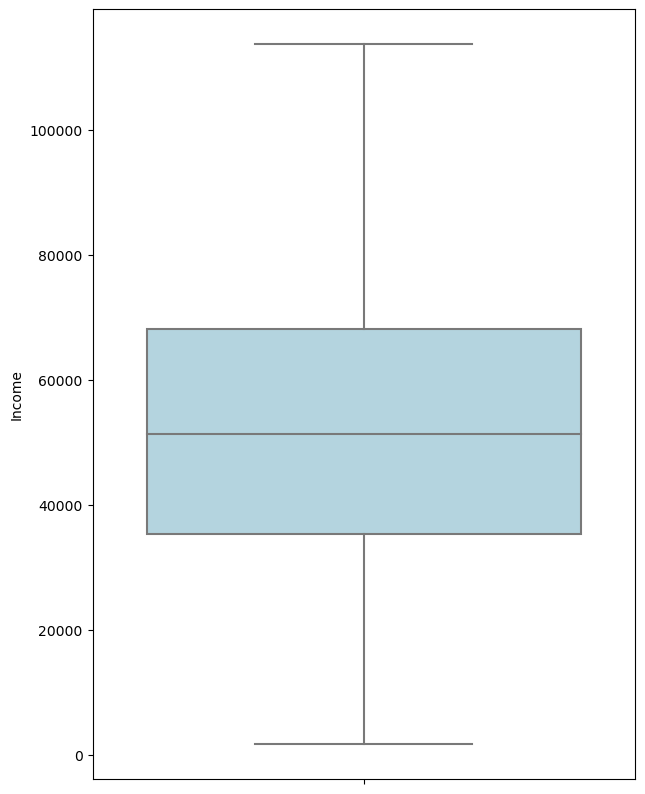

In [39]:
# checking to confirm no more outliers

# income distribution
plt.figure(figsize=[7, 10])
sns.boxplot(y=data['Income'], color='lightblue', linewidth=1.5)

In [40]:
from sklearn.preprocessing import StandardScaler, LabelEncoder

In [41]:
# apply label encoding and scale the dataset
le = LabelEncoder()
cat_cols = data.select_dtypes(include='object').columns
for col in cat_cols:
    data[col] = le.fit_transform(data[col])
    
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data)
data_scaled = pd.DataFrame(scaled_data, columns=data.columns)
data_scaled.head()

Education    Income   Kidhome  Teenhome   Recency  MntWines  MntFruits  \
0  -0.893147  0.316484 -0.825592 -0.931676  0.307314  0.980166   1.550778   
1  -0.893147 -0.256135  1.031365  0.904492 -0.383771 -0.873191  -0.637618   
2  -0.893147  0.970719 -0.825592 -0.931676 -0.798422  0.359410   0.569773   
3  -0.893147 -1.212506  1.031365 -0.931676 -0.798422 -0.873191  -0.562156   
4   0.570695  0.324010  1.031365 -0.931676  1.551268 -0.392031   0.418849   

   MntMeatProducts  MntFishProducts  MntSweetProducts  ...  AcceptedCmp2  \
0         1.736151         2.456789          1.472029  ...     -0.116801   
1        -0.726371        -0.651738         -0.632996  ...     -0.116801   
2        -0.174584         1.341376         -0.149082  ...     -0.116801   
3        -0.662528        -0.505455         -0.584604  ...     -0.116801   
4        -0.215626         0.152822         -0.003908  ...     -0.116801   

   Complain  Response       Age     Spent  Living_With  Dependent  \
0 -0.095152  2.381943  1.015715  1.683247    -1.345676  -1.266277   
1 -0.095152 -0.419825  1.272020 -0.962795    -1.345676   1.393978   
2 -0.095152 -0.419825  0.332234  0.283674     0.743121  -1.266277   
3 -0.095152 -0.419825 -1.291031 -0.919526     0.743121   0.063851   
4 -0.095152 -0.419825 -1.034726 -0.305445     0.743121   0.063851   

   Family_Size  Is_Parent  Website_Activity  
0    -1.759459  -1.587869          1.565064  
1     0.445057   0.629775         -0.965707  
2    -0.657201  -1.587869          0.721474  
3     0.445057   0.629775         -0.403314  
4     0.445057   0.629775          0.159080  

[5 rows x 30 columns]

# Dimensionality Reduction Using Principal Component Analysis
Dimensionality reduction is a technique used to reduce the number of features or variables in a dataset while preserving the essential information, Principal Component Analysis PCA which transforms the original features into a new set of orthogonal variables called principal components

PCA not only for dimensionality reduction but also to mitigate the impact of highly correlated features, resulting in a more robust and accurate clustering analysis.

In [42]:
# copy the dataset into a new variable X
X = data_scaled.copy()

# Apply PCA for dimensionality reduction. Keep 3 componenets
pca = PCA(n_components=3)

#Fit the model with X and apply the dimensionality reduction on X.
X_pca = pca.fit_transform(X)



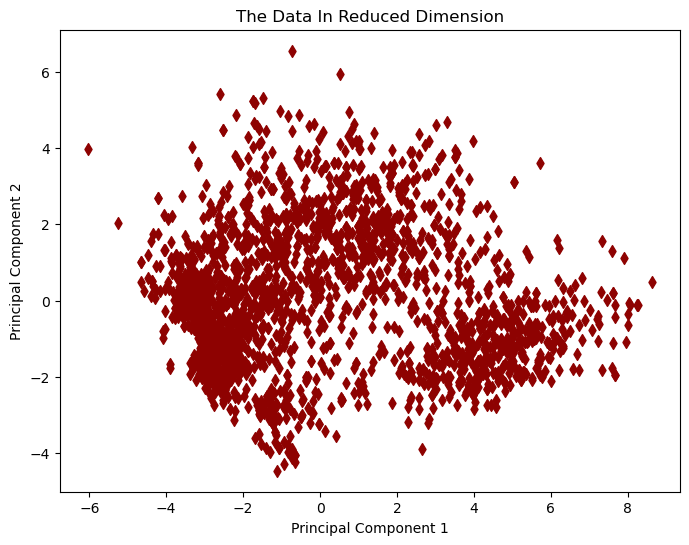

In [43]:
# Plot the reduced dimension using PCA
plt.figure(figsize=[8, 6])
plt.scatter(X_pca[:, 0], X_pca[:, 1], marker='d', c= '#8e0201')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('The Data In Reduced Dimension')
plt.show()

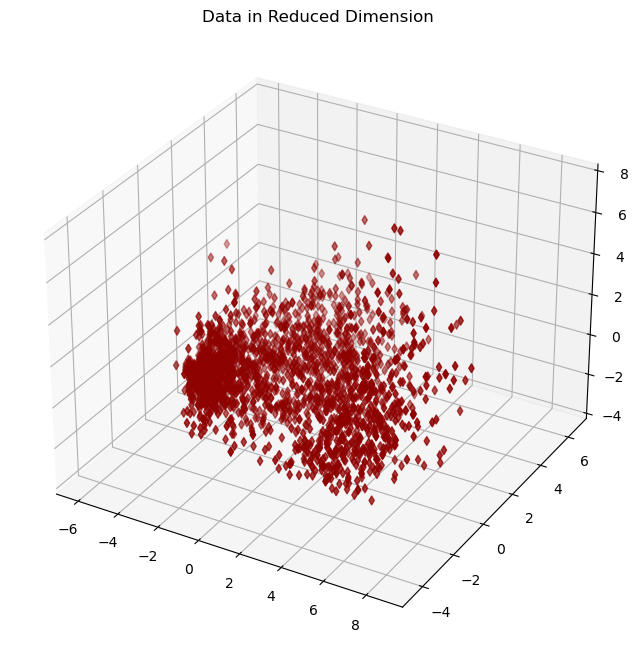

In [44]:
fig = plt.figure(figsize=(10, 8))
x, y, z = X_pca[:, 0], X_pca[:, 1], X_pca[:, 2]
colors = '#8e0201'
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x,y, z, c=colors, marker="d")
ax.set_title('Data in Reduced Dimension')
plt.show()

## Checking the optimal number of clusters
To check the optimal number of clusters, we use the following evaluation techniques namely;

    Elbow Curve method
    Silhouette score Curve method
    Calinski-Harabasz index curve


In [45]:
from sklearn.metrics import silhouette_score, calinski_harabasz_score
from sklearn.cluster import KMeans

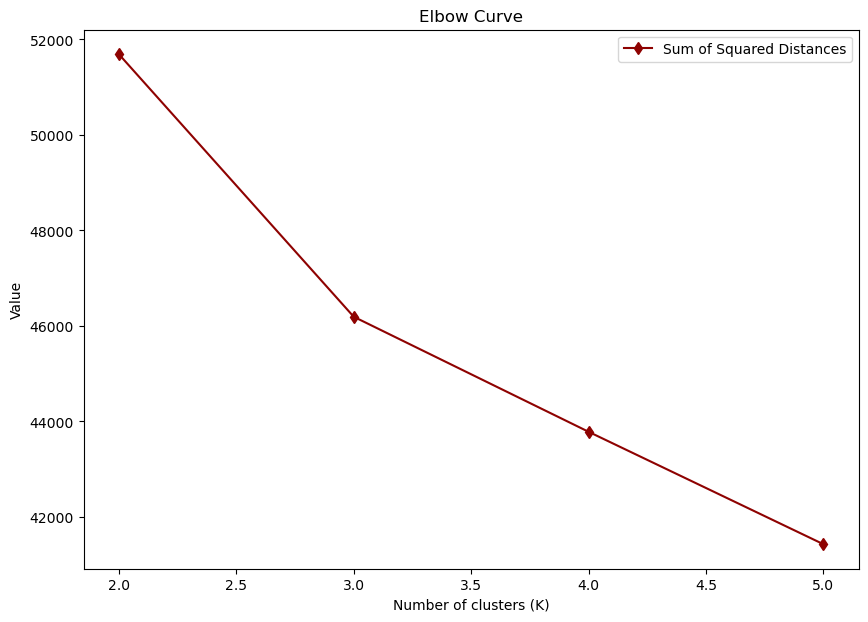

The optimal number of clusters (Elbow method) is: 4


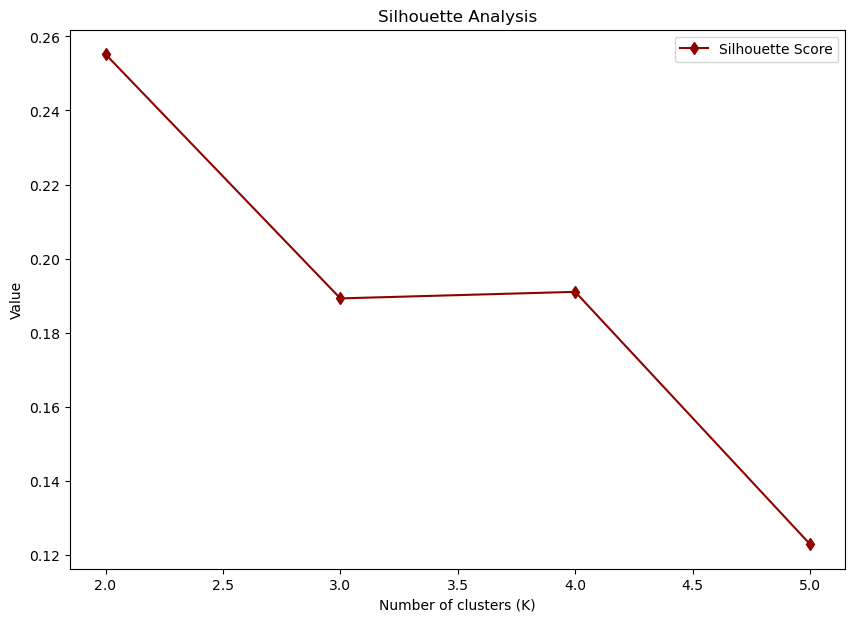

The optimal number of clusters (Silhouette method) is: 2


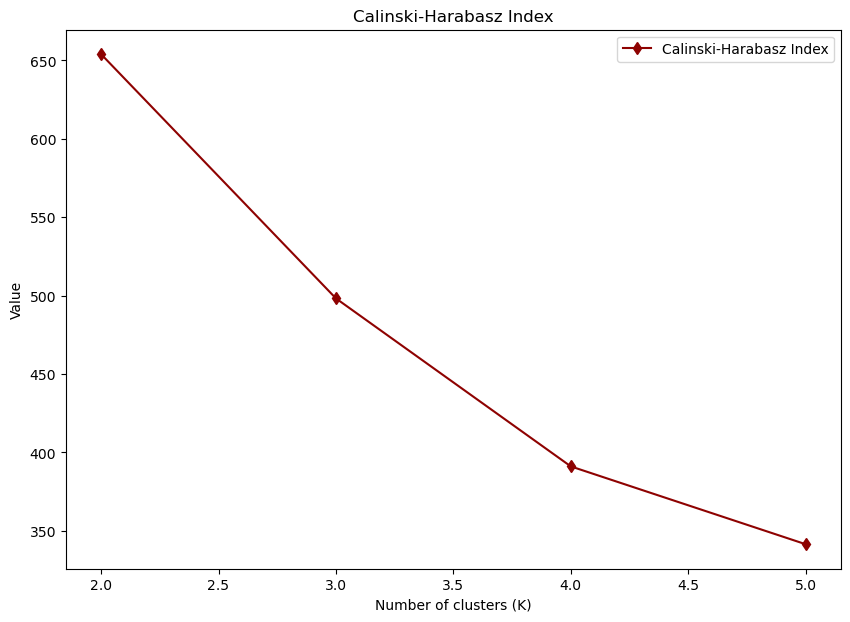

The optimal number of clusters (Calinski-Harabasz method) is: 2


In [46]:
min_clusters = 2
max_clusters = 5
distortions = []
silhouette_scores = []
ch_scores = []

# Fit K-means and compute the sum of squared distances, silhouette scores, and CH scores
for k in range(min_clusters, max_clusters + 1):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(data_scaled)
    distortions.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(data_scaled, kmeans.labels_))
    ch_scores.append(calinski_harabasz_score(data_scaled, kmeans.labels_))

# Plot the elbow curve
plt.figure(figsize=[10, 7])
plt.plot(range(min_clusters, max_clusters + 1), distortions, marker='d', label='Sum of Squared Distances', color='#8e0201')
plt.xlabel('Number of clusters (K)')
plt.ylabel('Value')
plt.title('Elbow Curve')
plt.legend()
plt.show()

rate_of_change = np.diff(distortions)
rate_of_change_ratio = rate_of_change[1:] / rate_of_change[:-1]
optimal_k_elbow = np.argmax(rate_of_change_ratio) + min_clusters + 1

# Print the optimal number of clusters based on the elbow method
print(f"The optimal number of clusters (Elbow method) is: {optimal_k_elbow}")

# Plot the silhouette scores
plt.figure(figsize=[10, 7])
plt.plot(range(min_clusters, max_clusters + 1), silhouette_scores, marker='d', label='Silhouette Score', color='#8e0201')
plt.xlabel('Number of clusters (K)')
plt.ylabel('Value')
plt.title('Silhouette Analysis')
plt.legend()
plt.show()

# Identify the optimal number of clusters using silhouette score
optimal_k_silhouette = np.argmax(silhouette_scores) + min_clusters

# Print the optimal number of clusters based on the silhouette method
print(f"The optimal number of clusters (Silhouette method) is: {optimal_k_silhouette}")

# Plot the Calinski-Harabasz scores
plt.figure(figsize=[10, 7])
plt.plot(range(min_clusters, max_clusters + 1), ch_scores, marker='d', label='Calinski-Harabasz Index', color='#8e0201')
plt.xlabel('Number of clusters (K)')
plt.ylabel('Value')
plt.title('Calinski-Harabasz Index')
plt.legend()
plt.show()

# Identify the optimal number of clusters using Calinski-Harabasz index
optimal_k_ch = np.argmax(ch_scores) + min_clusters

# Print the optimal number of clusters based on the Calinski-Harabasz index
print(f"The optimal number of clusters (Calinski-Harabasz method) is: {optimal_k_ch}")

In this case, we would prioritize the Silhouette method and the Calinski-Harabasz method, as they both provide insights into the quality and separation of the clusters. <br>
The **Silhouette method** suggests 2 aclusters, indicating that the data points within each cluster are relatively well-separated from points in other clusters. This could imply a clear distinction between two major customer segments. <br>
The **Calinski-Harabasz method** also suggests 2 clusters, indicating a high inter-cluster variance compared to the intra-cluster variance. This suggests that the clusters are well-separated and distinct from each other.

After performing dimensionality reduction using PCA and also finding the optimal number of Clusters, we will cluster the data and visualize it using the `Agglomerative Clustering algorithm.`

## Agglomerative Clustering

Now that I have reduced the attributes to two dimensions, I will be performing segmentation by clustering via Agglomerative clustering. Agglomerative clustering is a hierarchical clustering method. It involves merging examples until the desired number of clusters is achieved. And since we have `2` to be the optimal number of clusters from the methods we used above, we will set it to 2 in the Agglomerative Clustering.

In [47]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='white')
import plotly.express as px


In [48]:
# Fit Agglomerative Clustering model
clustering = AgglomerativeClustering(n_clusters=2)
clustering.fit_predict(X_pca)

# Obtain cluster labels
cluster_labels = clustering.labels_

# Add the cluster labels to the original dataframe
data_clustered = data_scaled.copy()
data_clustered['Cluster'] = cluster_labels

# Analyze Clusters
cluster_counts = data_clustered['Cluster'].value_counts()
print('Cluster Counts:')
print(cluster_counts)



Cluster Counts:
0    1746
1     483
Name: Cluster, dtype: int64


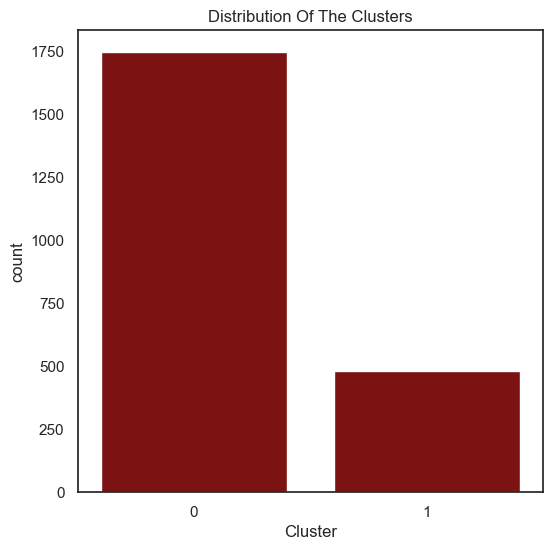

In [49]:
plt.figure(figsize=[6, 6])
order = data_clustered['Cluster'].value_counts().index
pl = sns.countplot(x=data_clustered["Cluster"], color='#8e0201', order=order)
pl.set_title("Distribution Of The Clusters")
plt.show()

We can see that the clusters are evenly distributed.

In [50]:
# Evaluate clustering results
silhouette_avg = silhouette_score(X_pca, cluster_labels)
print(f"Silhouette Score: {silhouette_avg:.1f}")

# Calculate cluster means
cluster_means = data_clustered.groupby('Cluster').mean()
print('\nCluster Means:')
display(cluster_means)

Silhouette Score: 0.4

Cluster Means:


Education    Income   Kidhome  Teenhome   Recency  MntWines  \
Cluster                                                                
0         0.019868 -0.327562  0.224131  0.249318 -0.010343 -0.262434   
1        -0.071820  1.184107 -0.810213 -0.901263  0.037390  0.948675   

         MntFruits  MntMeatProducts  MntFishProducts  MntSweetProducts  ...  \
Cluster                                                                 ...   
0        -0.274974        -0.389758        -0.293035         -0.262716  ...   
1         0.994006         1.408938         1.059296          0.949693  ...   

         AcceptedCmp2  Complain  Response       Age     Spent  Living_With  \
Cluster                                                                      
0           -0.062127  0.008101 -0.127774 -0.012931 -0.366608     0.032499   
1            0.224583 -0.029284  0.461891  0.046744  1.325253    -0.117481   

         Dependent  Family_Size  Is_Parent  Website_Activity  
Cluster                                                       
0         0.341151     0.299857   0.424014          0.154087  
1        -1.233230    -1.083955  -1.532772         -0.557011  

[2 rows x 30 columns]

In [51]:
# Add cluster labels to original dataset
clusters = cluster_labels
data['Clusters'] = clusters.astype(int)

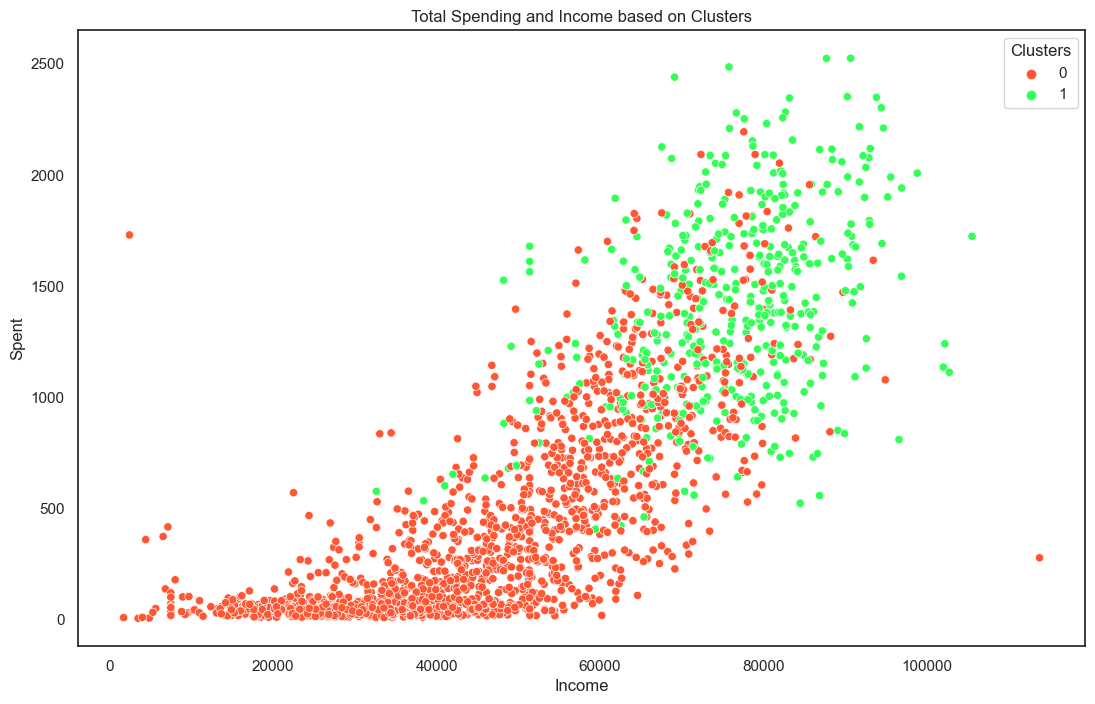

In [65]:
# Define your custom color palette
custom_palette = ["#FF5733", "#33FF57", "#3366FF"]  # Example custom colors

plt.figure(figsize=[13, 8])
pl = sns.scatterplot(data=data, x='Income', y='Spent', hue=data['Clusters'], palette=custom_palette)
plt.title('Total Spending and Income based on Clusters')
plt.show()

**Insights:** <br>
Cluster 1: High Income and High Spending <br>
Cluster : Low Income and Low Spending

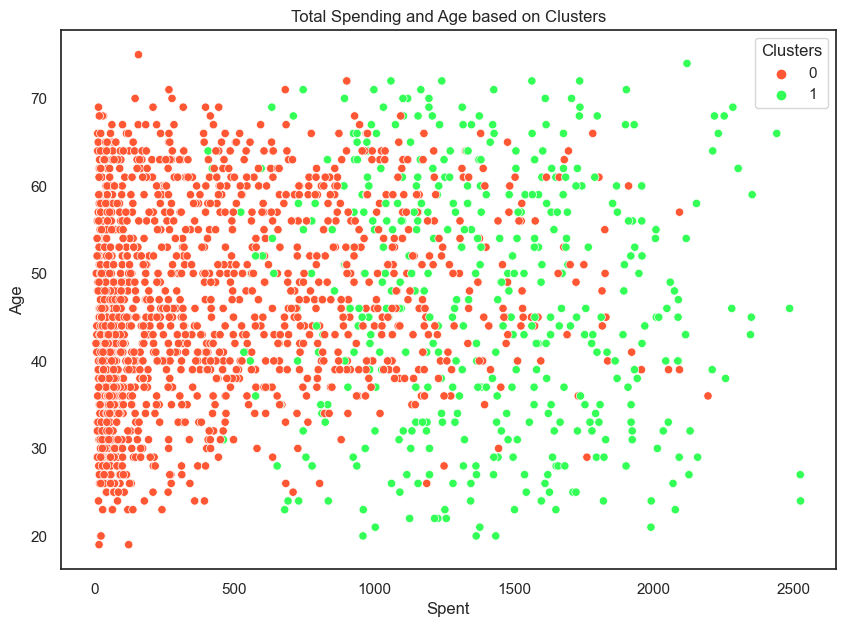

In [68]:
plt.figure(figsize=[10, 7])
colors = ["#FF5733", "#33FF57", "#3366FF"]
palette = sns.set_palette(sns.color_palette(colors))
sns.scatterplot(data=data, x='Spent', y='Age', hue='Clusters', palette=palette)
plt.title('Total Spending and Age based on Clusters')
plt.show();

**Insights:** <br>
There isn't much insight to be drawn from the above cluster patterns of the relationship between Customer's age and the total amount they have spent as can be seen above.

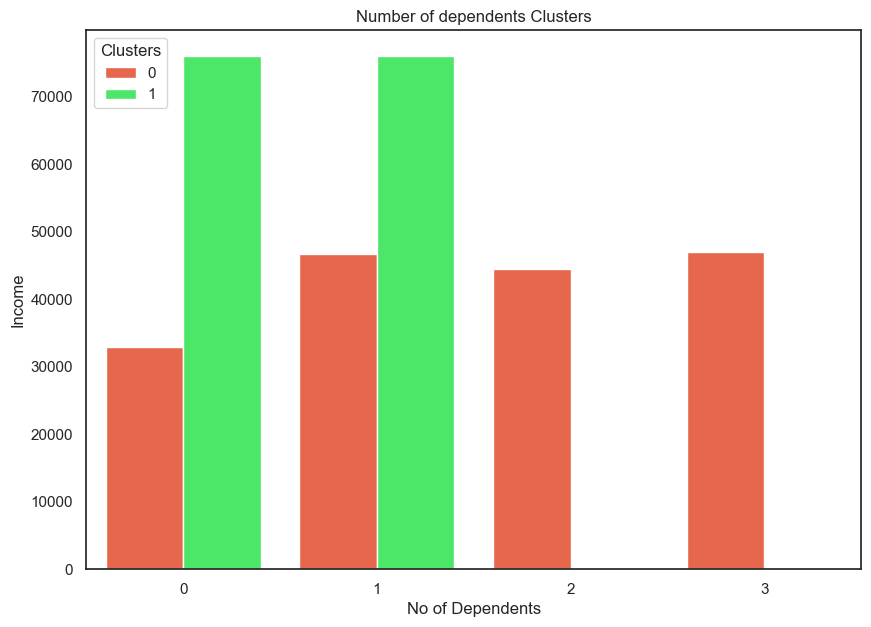

In [70]:
# no_of_dependents vs income
plt.figure(figsize=[10, 7])
colors = ["#FF5733", "#33FF57", "#3366FF"]
palette = sns.set_palette(sns.color_palette(colors))
sns.barplot(data=data, x='Dependent', y='Income', hue='Clusters', palette=palette, ci=None)
plt.title('Number of dependents Clusters')
plt.xlabel('No of Dependents')
plt.ylabel('Income')
# plt.xticks(ticks=[0, 1], labels=['Single', 'Married'])
plt.show();

**Insights:** <br>
Majority of customers in Cluster 0 have no dependent/child and they have the highest income while most customers in Cluster 1 have 3 dependents/children and are the highest earners in this case.

 Most customers didn't make a complaint in the last two years.
- Most customers have a single dependent/child in their household.
- Most customers made purchases via the Store.
- Most customers enrolled between 20 and 25 months ago
- Majority of the customers have partners.
- Majority of the customers have been Graduates.
- Majority of the customers are parents.

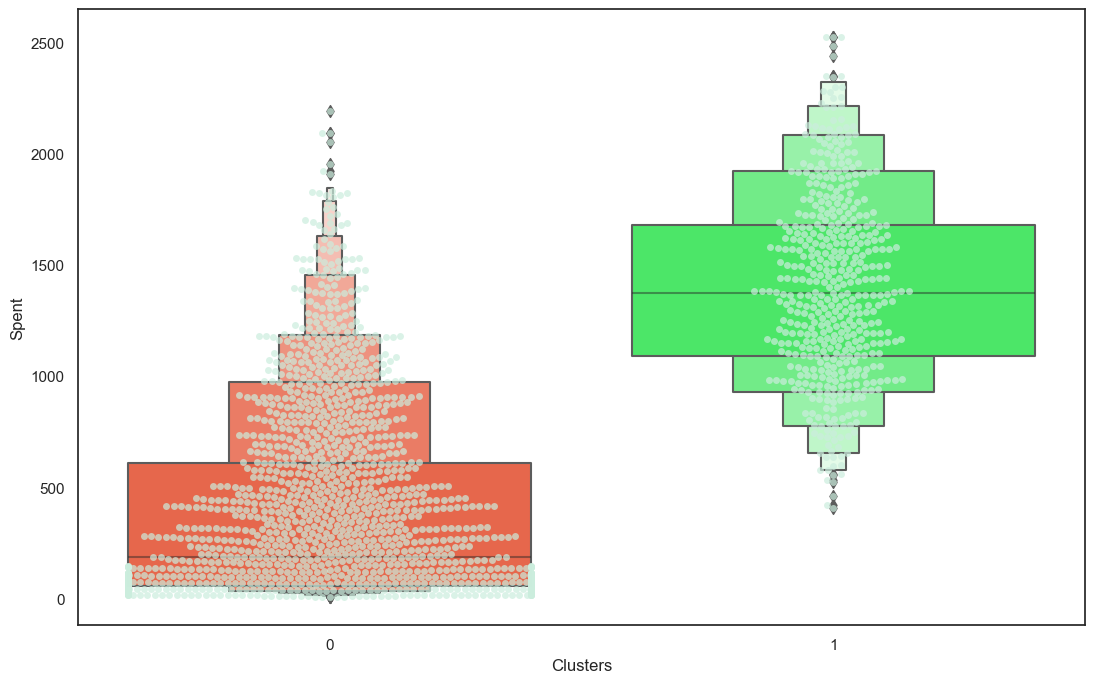

In [71]:
plt.figure(figsize=(13,8))
pl = sns.swarmplot(x=data['Clusters'], y=data['Spent'], color="#CBEDDD", alpha=0.7)
pl = sns.boxenplot(x=data['Clusters'], y=data['Spent'], palette=pal)
plt.show();

#### From the above plot, it can be clearly seen that cluster 1 is our biggest set of customers closely followed by cluster 0. We can explore what each cluster is spending on for the targeted marketing strategies.

#### Plotting count of total campaign accepted.

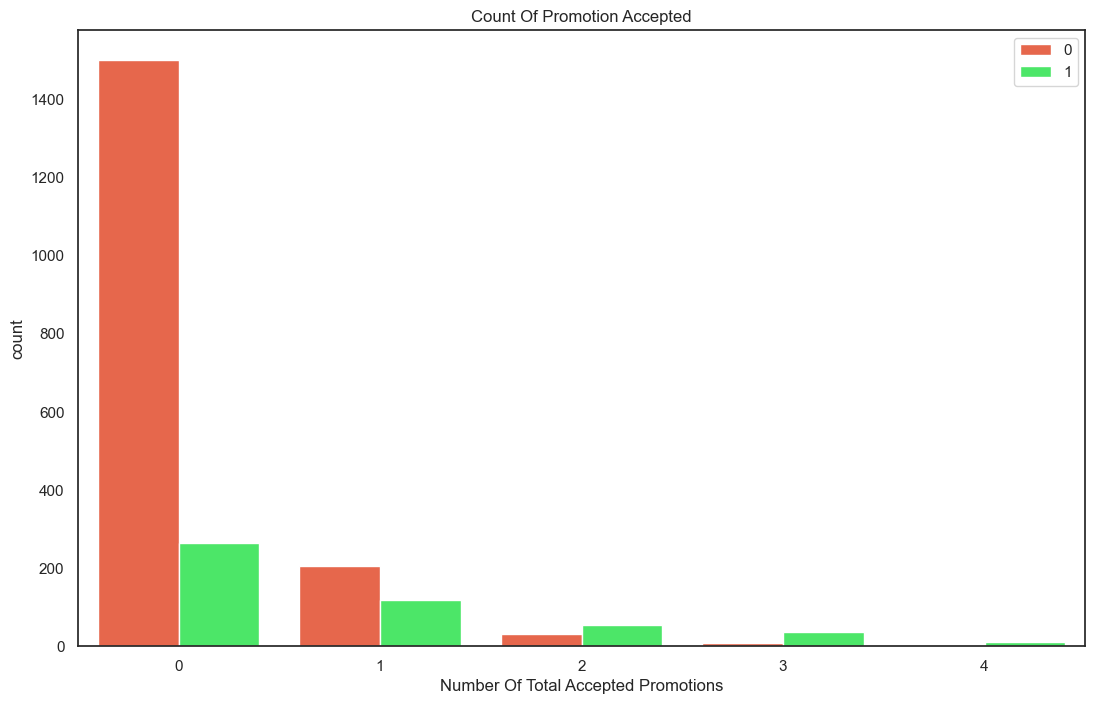

In [73]:
data['Total_Promos'] = data['AcceptedCmp1']+ data['AcceptedCmp2']+ data['AcceptedCmp3']+ data['AcceptedCmp4']+ data['AcceptedCmp5']

plt.figure(figsize=(13,8))
pl = sns.countplot(x=data['Total_Promos'], hue=data['Clusters'], palette= pal)
pl.set_title('Count Of Promotion Accepted')
pl.set_xlabel('Number Of Total Accepted Promotions')
plt.legend(loc='upper right')
plt.show();

#### There has not been an overwhelming response to the campaigns so far. Very few participants overall. Moreover, no one part take in all 5 of them. Perhaps better-targeted and well-planned campaigns are required to boost sales.

#### Plotting the number of deals purchased

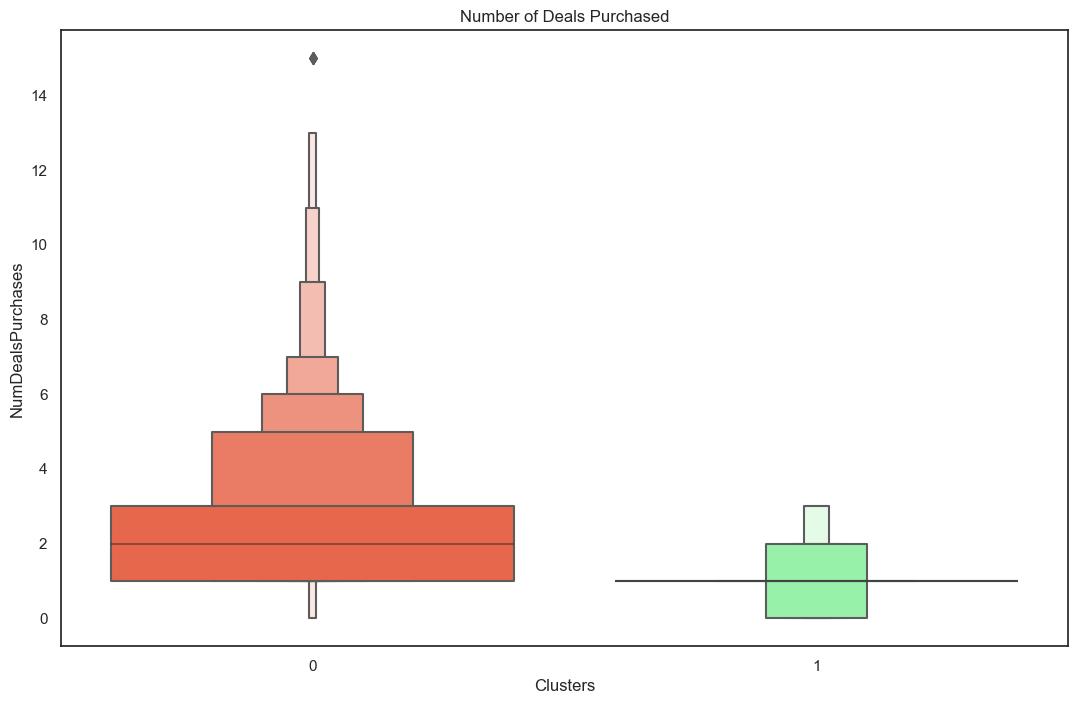

In [74]:
plt.figure(figsize=(13,8))
pl=sns.boxenplot(y=data['NumDealsPurchases'],x=data['Clusters'], palette= pal)
pl.set_title('Number of Deals Purchased');

#### Unlike campaigns, the deals offered did well. It has best outcome with cluster 0 and cluster 3. However, our star customers cluster 1 are not much into the deals. Nothing seems to attract cluster 0 overwhelmingly

<Figure size 1300x800 with 0 Axes>

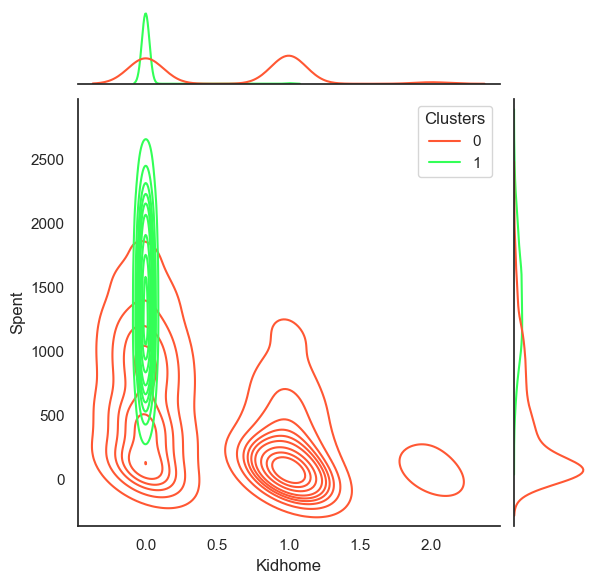

<Figure size 1300x800 with 0 Axes>

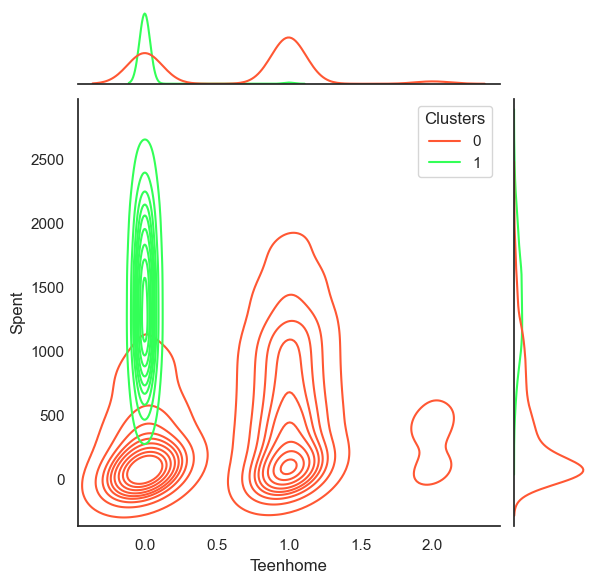

<Figure size 1300x800 with 0 Axes>

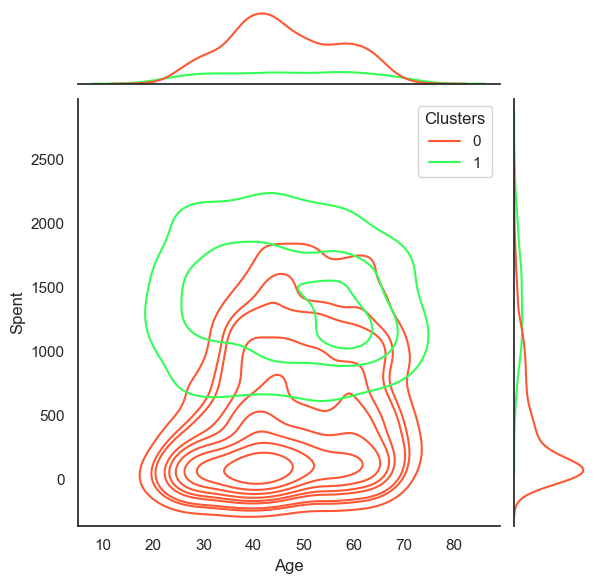

<Figure size 1300x800 with 0 Axes>

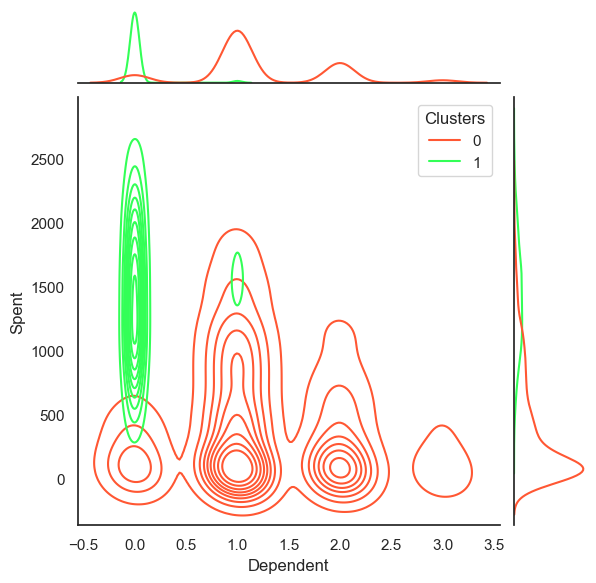

<Figure size 1300x800 with 0 Axes>

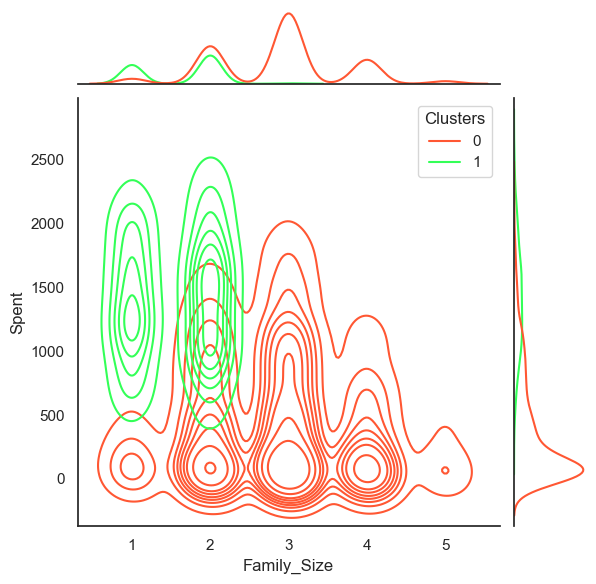

<Figure size 1300x800 with 0 Axes>

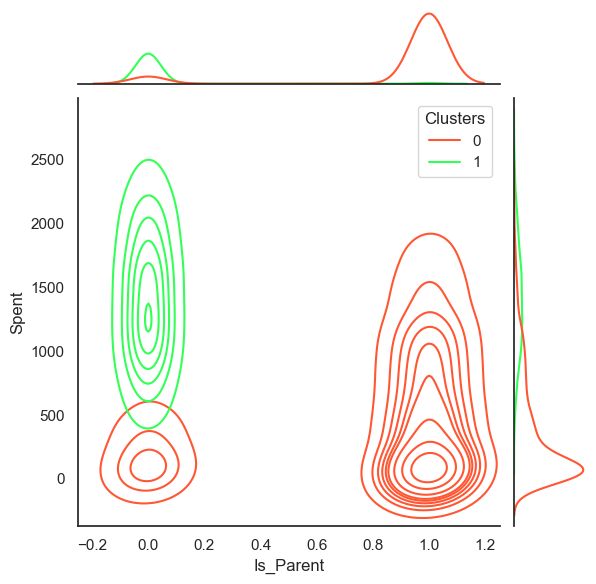

<Figure size 1300x800 with 0 Axes>

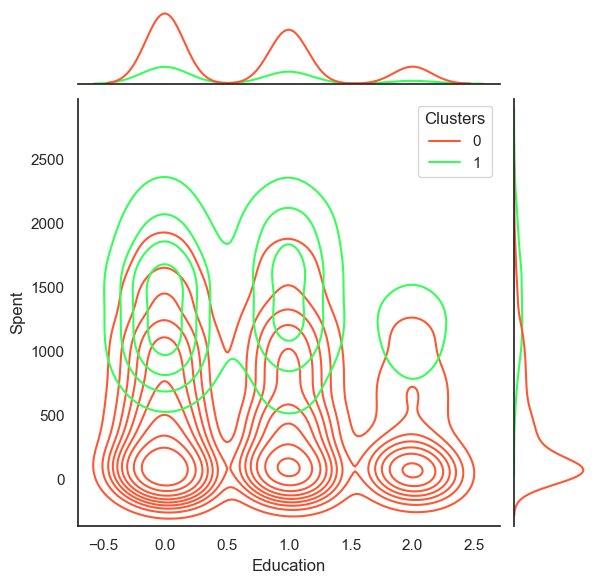

<Figure size 1300x800 with 0 Axes>

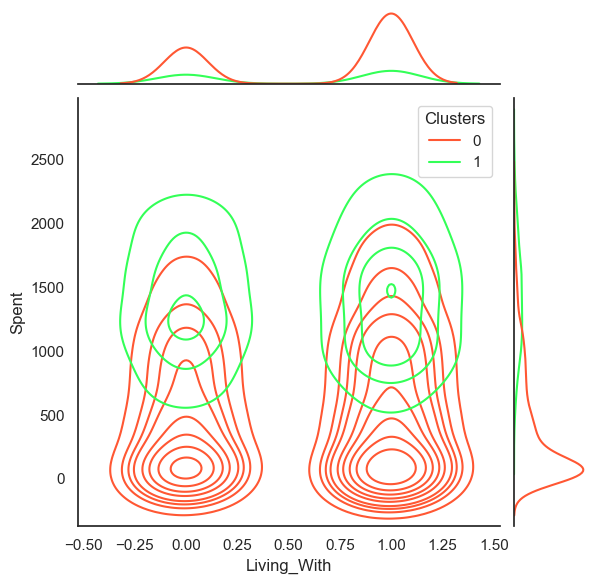

In [76]:
Personal = ['Kidhome', 'Teenhome', 'Age', 'Dependent', 'Family_Size', 'Is_Parent', 'Education', 'Living_With']

for i in Personal:
    plt.figure(figsize=(13,8))
    sns.jointplot(x=data[i], y=data['Spent'], hue=data['Clusters'], kind='kde', palette=pal);
     

#### About Cluster 0:

    The majority of these people are parents
    At max have 3 members in the family
    They majorly have one kid and typically not tennagers
    Relatively younger
#### About Cluster 1:

    Definitely a parent
    At max have 4 members in the family and at least 2
    Most have a teeanger in home
    Single parents are a subset of this group
    Relatively older

## KNN

In [55]:
data.columns

Index(['Education', 'Income', 'Kidhome', 'Teenhome', 'Recency', 'MntWines',
       'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Response', 'Age', 'Spent', 'Living_With',
       'Dependent', 'Family_Size', 'Is_Parent', 'Website_Activity',
       'Clusters'],
      dtype='object')

[0 1]
Train set: (1783, 30) (1783,)
Test set: (446, 30) (446,)
The optimal number of neighbors is 11


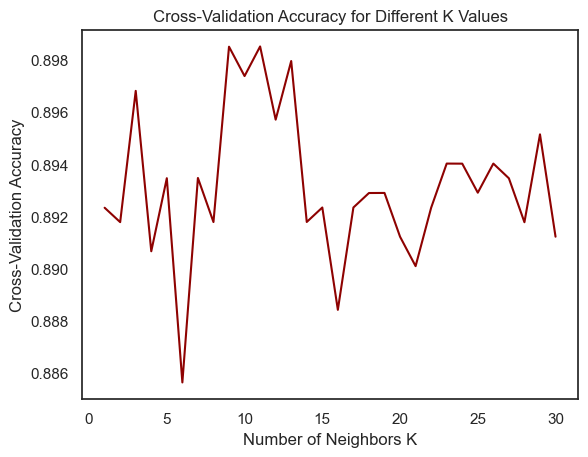

Accuracy: 0.91
Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.93      0.94       351
           1       0.77      0.83      0.80        95

    accuracy                           0.91       446
   macro avg       0.86      0.88      0.87       446
weighted avg       0.91      0.91      0.91       446



In [56]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import LabelEncoder


# Assume the last column is the target (customer segment) and the rest are features
X = data.iloc[:, :-1].values  # Features
y = data.iloc[:, -1].values   # Target labels (customer segments)

# Check the unique values in y to ensure they are categorical
print(np.unique(y))

# If y is not already categorical, convert it using LabelEncoder
if y.dtype.kind in 'fc':
    # This means y is float or continuous, convert to categorical
    le = LabelEncoder()
    y = le.fit_transform(y)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)
# Determine the optimal k using cross-validation
k_values = range(1, 31)
cv_scores = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X_train, y_train, cv=10, scoring='accuracy')
    cv_scores.append(scores.mean())

# Find the k with the highest mean cross-validation score
optimal_k = k_values[np.argmax(cv_scores)]
print(f'The optimal number of neighbors is {optimal_k}')

# Plot the cross-validation scores
import matplotlib.pyplot as plt

plt.plot(k_values, cv_scores)
plt.xlabel('Number of Neighbors K')
plt.ylabel('Cross-Validation Accuracy')
plt.title('Cross-Validation Accuracy for Different K Values')
plt.show()

# Train the final model with the optimal k
knn = KNeighborsClassifier(n_neighbors=optimal_k)
knn.fit(X_train, y_train)

# Predict the segments for the test set
y_pred = knn.predict(X_test)

# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

# Print a detailed classification report
print('Classification Report:')
print(classification_report(y_test, y_pred))


In [57]:
data.columns

Index(['Education', 'Income', 'Kidhome', 'Teenhome', 'Recency', 'MntWines',
       'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Response', 'Age', 'Spent', 'Living_With',
       'Dependent', 'Family_Size', 'Is_Parent', 'Website_Activity',
       'Clusters'],
      dtype='object')

In [58]:
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt


#### Other models

In [59]:
# Assuming 'Clusters' is the target variable
X = data.drop('Clusters', axis=1)
y = data['Clusters']

# Convert categorical variables if necessary
categorical_cols = ['Education', 'Living_With', 'Is_Parent']  # Example categorical columns
for col in categorical_cols:
    X[col] = LabelEncoder().fit_transform(X[col])

# Standardize features
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define a function to evaluate multiple models
def evaluate_model(model, X_train, y_train, X_test, y_test):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print(f'Accuracy: {accuracy:.2f}')
    print('Classification Report:')
    print(classification_report(y_test, y_pred))

# Decision Tree Classifier
tree_params = {'max_depth': range(1, 21)}
tree = GridSearchCV(DecisionTreeClassifier(), tree_params, cv=5)
print("\nDecision Tree Classifier")
evaluate_model(tree, X_train, y_train, X_test, y_test)

# Random Forest Classifier
forest_params = {'n_estimators': [100, 200], 'max_depth': range(1, 21)}
forest = GridSearchCV(RandomForestClassifier(), forest_params, cv=5)
print("\nRandom Forest Classifier")
evaluate_model(forest, X_train, y_train, X_test, y_test)

# Support Vector Machine
svm_params = {'C': [0.1, 1, 10], 'gamma': [0.01, 0.1, 1]}
svm = GridSearchCV(SVC(), svm_params, cv=5)
print("\nSupport Vector Machine")
evaluate_model(svm, X_train, y_train, X_test, y_test)

# Gradient Boosting Classifier
gbc_params = {'n_estimators': [100, 200], 'learning_rate': [0.01, 0.1, 1]}
gbc = GridSearchCV(GradientBoostingClassifier(), gbc_params, cv=5)
print("\nGradient Boosting Classifier")
evaluate_model(gbc, X_train, y_train, X_test, y_test)


Decision Tree Classifier
Accuracy: 0.98
Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       351
           1       0.95      0.97      0.96        95

    accuracy                           0.98       446
   macro avg       0.97      0.98      0.97       446
weighted avg       0.98      0.98      0.98       446


Random Forest Classifier
Accuracy: 0.99
Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.99      0.99       351
           1       0.97      0.99      0.98        95

    accuracy                           0.99       446
   macro avg       0.98      0.99      0.99       446
weighted avg       0.99      0.99      0.99       446


Support Vector Machine
Accuracy: 0.99
Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       351
           1       0.98      0.98      0.98    